In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [2]:
# read the data
df=pd.read_csv('/Users/web/Library/CloudStorage/Dropbox/NTU_course/Senior1/ML_HT/code/final_regular/JSH/train_data_add_nearby/500101008.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7
0,500101008,20231002,1,17,1,25.02112,121.53407,16
1,500101008,20231002,2,17,1,25.02112,121.53407,16
2,500101008,20231002,3,17,1,25.02112,121.53407,16
3,500101008,20231002,4,17,1,25.02112,121.53407,16
4,500101008,20231002,5,17,1,25.02112,121.53407,16


In [3]:
df_useful = df.iloc[ :, [1,2,7] ]
# df_useful = str(df.iloc[ :, [1] ]) + "_" + str(df.iloc[ :, [2] ])
df_useful.columns = [ "date", "time", "bikes"]
df_useful.head(5)

,date,time,bikes
0,20231002,1,16
1,20231002,2,16
2,20231002,3,16
3,20231002,4,16
4,20231002,5,16


In [4]:
df_useful[['hr','minutes']] = df_useful['time'].apply(lambda x: divmod(x, 60)).apply(pd.Series)

# Combine 'date' and 'time' columns into a single datetime column
df_useful['datetime'] = pd.to_datetime( df_useful['date'].astype(str) + ' ' + df_useful['hr'].astype(str) + ":" + df_useful['minutes'].astype(str),  format='%Y%m%d %H:%M' )
df_useful.head(70)


# Drop the original 'date' and 'time' columns 
# df_useful = df_useful.drop(['date', 'time'], axis=1)

/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_31242/1293281550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful[['hr','minutes']] = df_useful['time'].apply(lambda x: divmod(x, 60)).apply(pd.Series)
/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_31242/1293281550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful[['hr','minutes']] = df_useful['time'].apply(lambda x: divmod(x, 60)).apply(pd.Series)
/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_31242

,date,time,bikes,hr,minutes,datetime
0,20231002,1,16,0,1,2023-10-02 00:01:00
1,20231002,2,16,0,2,2023-10-02 00:02:00
2,20231002,3,16,0,3,2023-10-02 00:03:00
3,20231002,4,16,0,4,2023-10-02 00:04:00
4,20231002,5,16,0,5,2023-10-02 00:05:00
...,...,...,...,...,...,...
65,20231002,67,16,1,7,2023-10-02 01:07:00
66,20231002,68,16,1,8,2023-10-02 01:08:00
67,20231002,69,16,1,9,2023-10-02 01:09:00
68,20231002,70,16,1,10,2023-10-02 01:10:00


In [5]:
# convert to the datetime format
df_time_bike = df_useful[['datetime', 'bikes']]
df_time_bike.set_index('datetime',inplace=True)
df_time_bike.iloc[1439*9+1000:1439*9+1500]

,bikes
datetime,
2023-10-16 05:35:00,17
2023-10-16 05:36:00,17
2023-10-16 05:37:00,17
2023-10-16 05:38:00,17
2023-10-16 05:39:00,17
...,...
2023-10-16 14:17:00,1
2023-10-16 14:18:00,1
2023-10-16 14:19:00,1


<Axes: xlabel='datetime'>

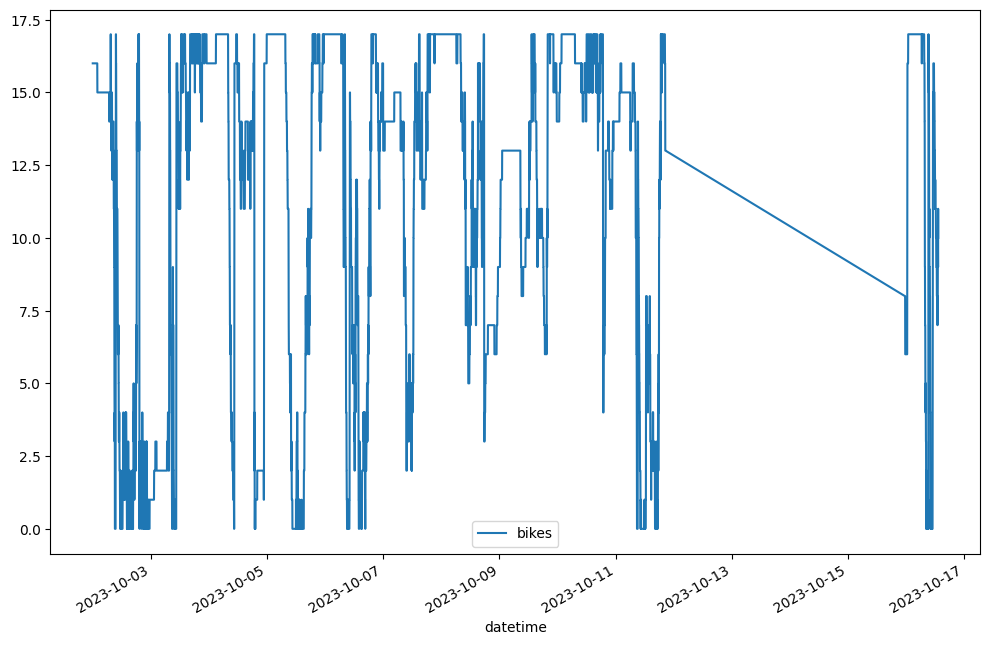

In [6]:
df_time_bike.head(1439*10).plot(figsize=(12,8))

## Differencing

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
# check if it is stationary
test_result=adfuller(df_time_bike['bikes'])

In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df_time_bike['bikes'])

ADF Test Statistic : -11.228033799106454
p-value : 1.9384895734639832e-20
#Lags Used : 11
Number of Observations Used : 60668
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


since our data is already stationary, d = 1 

## Auto Regressive

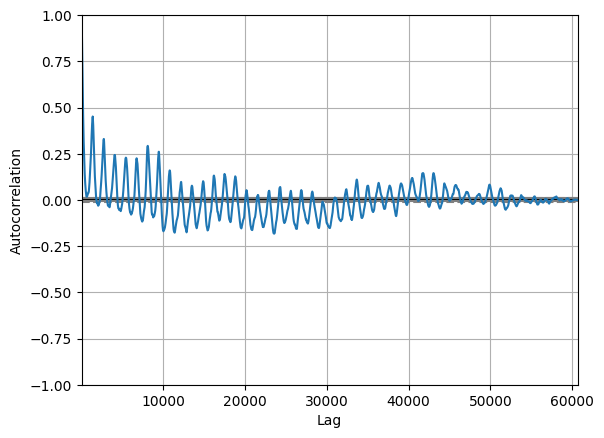

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_time_bike['bikes'])
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

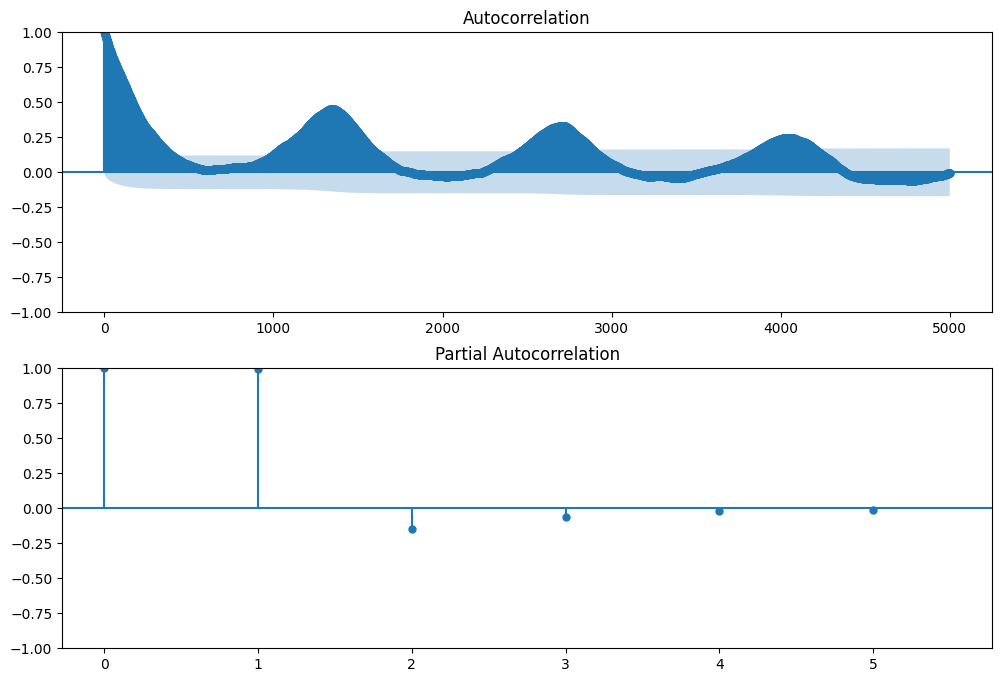

In [13]:
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# print(df_time_bike['bikes'].iloc[0:])
fig = plot_acf(df_time_bike['bikes'].iloc[0:],lags=5000,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_time_bike['bikes'].iloc[0:],lags=5,ax=ax2)


In ACF, the exponential decay ends around 500, so q = 500
In PACF, it shuts off at 1, so p = 1

## ARIMA

In [14]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA

In [15]:
train_date_end = -1439*5
model=ARIMA(df_time_bike['bikes'].iloc[:train_date_end], order=(1,0,0))
model_fit=model.fit()
# model_fit.summary()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/_5/lnn7mkls5qv284v9yq4ql7b40000gn/T/ipykernel_31242/4044049927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_bike['forecast']=model_fit.forecast( steps=1439*7 )
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base

<Axes: >

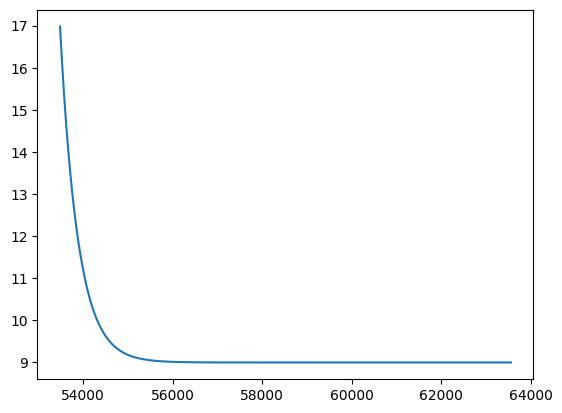

In [16]:
df_time_bike['forecast']=model_fit.forecast( steps=1439*7 )
# df_time_bike[['forecast']].plot(figsize=(12,8))
# print(type(model_fit.forecast( steps=1439*7 )))
model_fit.forecast( steps=1439*7 ).plot()

## SARIMAX

In [17]:
import statsmodels.api as sma

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50892D+00    |proj g|=  4.06168D+00


 This problem is unconstrained.



At iterate    5    f=  6.73765D-01    |proj g|=  1.60556D-01

At iterate   10    f=  6.09867D-01    |proj g|=  1.04846D-02

At iterate   15    f=  6.06861D-01    |proj g|=  2.57123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     37      1     0     0   2.571D-05   6.069D-01
  F =  0.60686147297954929     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

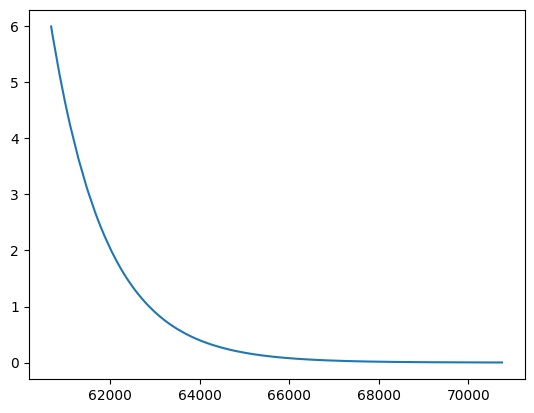

In [18]:
model=sma.tsa.statespace.SARIMAX(df_time_bike['bikes'],order=(1, 0, 0),seasonal_order=(1,0,1,14))
results=model.fit()
results.forecast( steps=1439*7 ).plot()
# df['forecast']=results.predict(start=90,end=103,dynamic=True)
# df_time_bike[['forecast']].plot(figsize=(12,8))